In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from scipy.stats import norm
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()
%matplotlib inline

In [2]:
ticker = 'PG'
data = pd.DataFrame()

data[ticker] = pdr.get_data_yahoo(ticker, start='2007-1-1', end='2017-3-21')["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [3]:
log_returns = np.log(1+data.pct_change())

In [4]:
r=0.025

In [5]:
stdev = log_returns.std()*252**0.5

In [6]:
stdev = stdev.values

In [7]:
T = 1.0
t_intervals = 252
delta_t = T/t_intervals

iterations = 10000

In [8]:
Z = np.random.standard_normal((t_intervals+1,iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] =S0

In [9]:
for t in range(1, t_intervals+1):
    S[t] = S[t-1] * np.exp((r-0.5 * stdev ** 2) * delta_t + stdev * delta_t **0.5 * Z[t])

In [10]:
S.shape

(253, 10000)

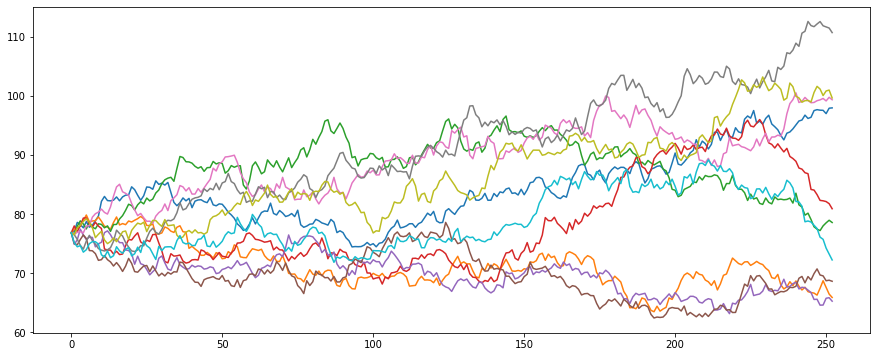

In [11]:
plt.figure(figsize=(15,6))
plt.plot(S[:,:10])

---

In [12]:
p = np.maximum(S[-1]-110,0)

In [13]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
p.shape

(10000,)

In [15]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

0.21058412711638202